In [2]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np

In [3]:
df=yf.download('GME',start='2020-01-07',  end='2021-01-07',progress=False)[['Close']]
df.head()

,Close
Date,
2020-01-07,5.52
2020-01-08,5.72
2020-01-09,5.55
2020-01-10,5.43
2020-01-13,5.43


In [4]:
df=pd.concat([df, df.shift(), df.shift(2),df.shift(3),df.shift(4),df.shift(5),
           df.shift(6),df.shift(7),df.shift(8),df.shift(9),df.shift(10)], axis=1).dropna()

df.columns=list(range(0,11))
df.rename(columns={0:'actual_stock_price'},inplace=True)

In [5]:
df

,actual_stock_price,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2020-01-22,4.560000,4.590000,4.750000,4.620000,4.610000,4.710000,5.430000,5.430000,5.550000,5.720000,5.52
2020-01-23,4.620000,4.560000,4.590000,4.750000,4.620000,4.610000,4.710000,5.430000,5.430000,5.550000,5.72
2020-01-24,4.320000,4.620000,4.560000,4.590000,4.750000,4.620000,4.610000,4.710000,5.430000,5.430000,5.55
2020-01-27,4.280000,4.320000,4.620000,4.560000,4.590000,4.750000,4.620000,4.610000,4.710000,5.430000,5.43
2020-01-28,4.210000,4.280000,4.320000,4.620000,4.560000,4.590000,4.750000,4.620000,4.610000,4.710000,5.43
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,19.260000,19.379999,20.990000,20.150000,20.570000,19.459999,15.530000,15.630000,14.830000,13.850000,13.85
2020-12-31,18.840000,19.260000,19.379999,20.990000,20.150000,20.570000,19.459999,15.530000,15.630000,14.830000,13.85
2021-01-04,17.250000,18.840000,19.260000,19.379999,20.990000,20.150000,20.570000,19.459999,15.530000,15.630000,14.83


<ipython-input-6-0cc16a9a56b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=lr.predict(test[list(range(1,11))])


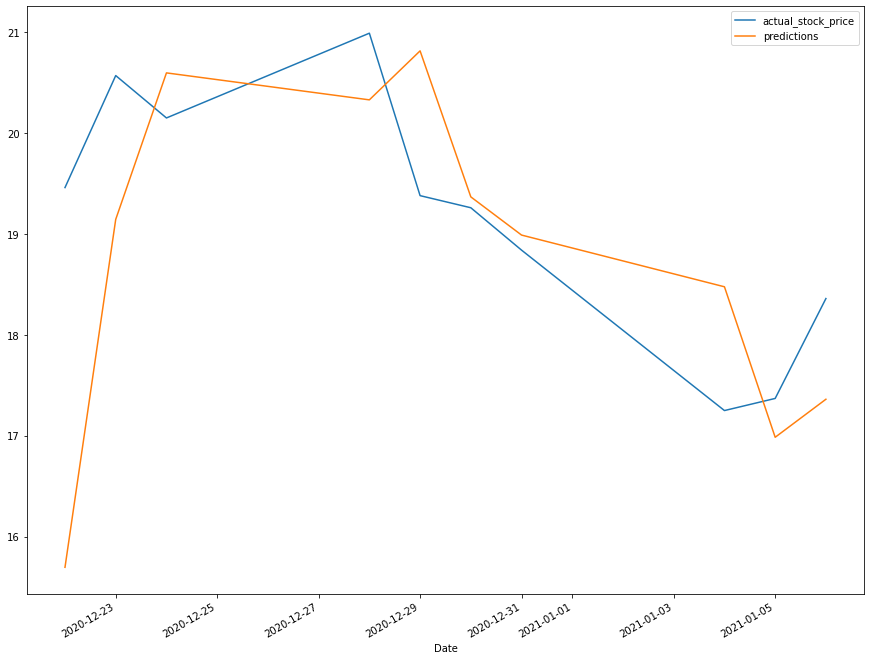

In [6]:
#split data into train and test. We will try to predict the last 10 days

train=df.head(len(df)-10)
test=df.tail(10)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[list(range(1,11))],train['actual_stock_price'])

test['predictions']=lr.predict(test[list(range(1,11))])

ax=test[['actual_stock_price','predictions']].plot(figsize=(15,12))

In [7]:
predictions=[]
for i in range(0,10):
    x=pd.concat([train, train.shift(), train.shift(2),train.shift(3),train.shift(4),train.shift(5),
               train.shift(6),train.shift(7),train.shift(8),train.shift(9)], axis=1).dropna().tail(1)
    x.columns=range(1,11)
    pred=lr.predict(x)
    predictions.append(pred[0])
    train =pd.concat([train ,pd.DataFrame( {'Close':pred},index=[train.tail(1).index[0]+datetime.timedelta(days=1)])])
    
test['predictions']=predictions
test.plot(figsize=(15,12))

ValueError: Length mismatch: Expected axis has 110 elements, new values have 10 elements

<ipython-input-13-d3731b1fb213>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=predictions


<AxesSubplot:xlabel='Date'>

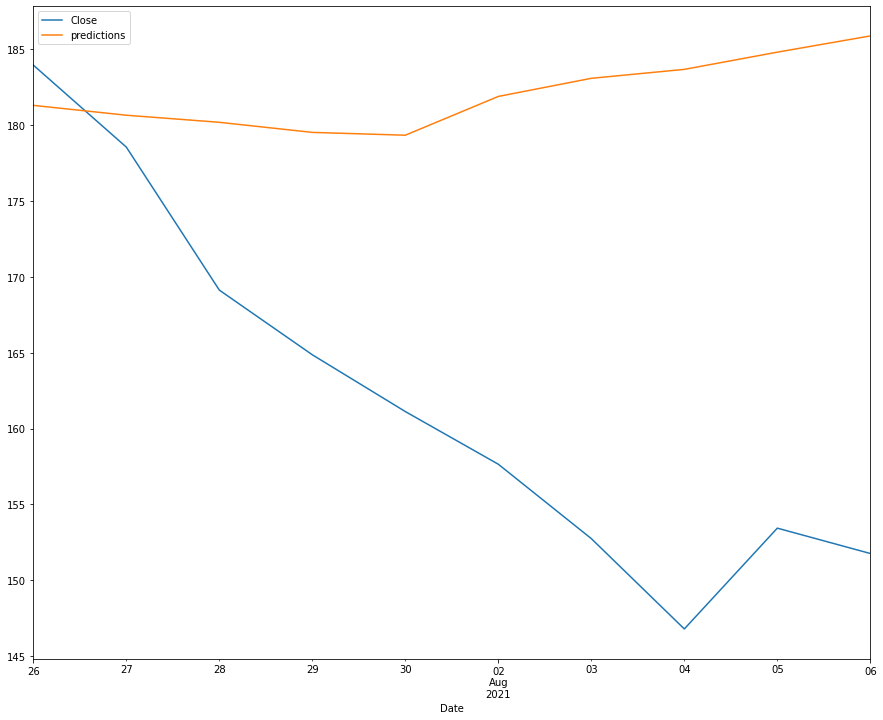

In [13]:
df=yf.download('GME',start='2021-01-01',  end='2021-12-01',progress=False)[['Close']]
train=df.head(len(df)-10)
test=df.tail(10)
predictions=[]
for i in range(0,10):
    x=pd.concat([train, train.shift(), train.shift(2),train.shift(3),train.shift(4),train.shift(5),
               train.shift(6),train.shift(7),train.shift(8),train.shift(9)], axis=1).dropna().tail(1)
    x.columns=range(1,11)
    pred=lr.predict(x)
    predictions.append(pred[0])
    train =pd.concat([train ,pd.DataFrame( {'Close':pred},index=[train.tail(1).index[0]+datetime.timedelta(days=1)])])
    
test['predictions']=predictions
test.plot(figsize=(15,12))

In [16]:
df=yf.download('GME',start='2020-01-01',  end='2021-12-01',progress=False)[['Close']]

In [15]:
df

,Close
Date,
2021-01-04,17.250000
2021-01-05,17.370001
2021-01-06,18.360001
2021-01-07,18.080000
2021-01-08,17.690001
...,...
2021-08-02,157.649994
2021-08-03,152.750000
2021-08-04,146.800003
